# 2020 모바일 어플리케이션 마켓 정보 분석

평소에 많이 사용하는 플레이스토어에 배포된 앱을 분석해봤습니다.

# Overview

### 1. 카테고리별 리뷰 평균 점수

### 2. 유료앱 여부와 리뷰 점수 상관관계

### 3. 광고를 포함하는 앱과 그렇지 않은 앱의 리뷰 평균 점수 비교

### 4. 결론

In [1]:
# 필요한 라이브러리 한번에 임포트
import pandas as pd
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
# plot 스타일을 미리 정의해놓은 패키지
import seaborn as sns
import squarify

# 한글 폰트
plt.rcParams['font.family'] = 'AppleGothic'

# 공통으로 사용할 플레이 스토어 데이터 읽어오기

In [2]:
# 필요한 데이터 임포트
playtore_df = pd.read_csv('playstore.csv', index_col=0, engine='python', encoding='utf-8')
playtore_df.head()

,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
App Name,,,,,,,,,,,,,,,,,,,,,
HTTrack Website Copier,com.httrack.android,Communication,3.6,2848.0,"100,000+",100000.0,351560,True,0.0,USD,...,Xavier Roche,http://www.httrack.com/,roche+android@httrack.com,"Aug 12, 2013","May 20, 2017",Everyone,http://android.httrack.com/privacy-policy.html,False,False,False
World War 2: Offline Strategy,com.skizze.wwii,Strategy,4.3,17297.0,"1,000,000+",1000000.0,2161778,True,0.0,USD,...,Skizze Games,http://stereo7.com/,Skizze.Games@gmail.com,"Jul 19, 2018","Nov 26, 2020",Everyone 10+,https://www.iubenda.com/privacy-policy/8032781,True,True,False
WPSApp,com.themausoft.wpsapp,Tools,4.2,488639.0,"50,000,000+",50000000.0,79304739,True,0.0,USD,...,TheMauSoft,http://www.themausoft.com,wpsapp.app@gmail.com,"Mar 7, 2016","Oct 21, 2020",Everyone,https://sites.google.com/view/wpsapppolicy/main,True,False,False
"OfficeSuite - Office, PDF, Word, Excel, PowerPoint",com.mobisystems.office,Business,4.2,1224420.0,"100,000,000+",100000000.0,163660067,True,0.0,USD,...,MobiSystems,http://www.mobisystems.com,support-officesuite-android@mobisystems.com,"Dec 22, 2011","Nov 23, 2020",Everyone,http://www.mobisystems.com/mobile/privacy-poli...,True,True,False
Loud Player Free,com.arthelion.loudplayer,Music & Audio,4.2,665.0,"50,000+",50000.0,73463,True,0.0,USD,...,Arthelion92,http://www.arthelion.com,arthelion92@gmail.com,"Sep 24, 2016","Nov 22, 2020",Everyone,http://www.arthelion.com/index.php/fr/android-...,False,False,False


# 1. 카테고리별 리뷰 평균 점수

## 1-1 카테고리별 데이타

In [3]:
categories = playtore_df['Category'].unique()
groupedAppByCategory = playtore_df.groupby('Category')

# print('스토어에 등록된 카테고리 목록')
# for category in categories:
#     print(category)
groupedAppByCategory.mean()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Ad Supported,In App Purchases,Editors Choice
Category,,,,,,,,,
Action,3.199303,40777.040552,1.120423e+06,2.042684e+06,0.957317,0.131585,0.877811,0.367121,0.005781
Adventure,3.115952,11175.093875,3.972175e+05,7.396449e+05,0.918609,0.312795,0.818451,0.294548,0.003457
Arcade,2.766632,14551.488202,6.722659e+05,1.195908e+06,0.957607,0.355522,0.845780,0.268304,0.000847
Art & Design,1.932258,1010.627384,7.422422e+04,1.159923e+05,0.986528,0.071751,0.872910,0.046340,0.000487
Auto & Vehicles,2.275074,1238.954223,2.176497e+05,2.864939e+05,0.961729,0.255783,0.449505,0.089639,0.000146
Beauty,1.700353,503.947622,5.164636e+04,8.358423e+04,0.996151,0.010144,0.721135,0.024535,0.000160
Board,3.152639,9766.717904,4.089541e+05,7.967233e+05,0.936134,0.223015,0.786162,0.305455,0.000570
Books & Reference,2.598829,859.044482,5.295924e+04,1.142776e+05,0.956894,0.260236,0.799111,0.062468,0.000101
Business,1.699900,1095.860691,1.072728e+05,1.542917e+05,0.983985,0.188813,0.131770,0.035702,0.000261


## 1-2 카테고리 별 앱 개수

Text(0.5, 1.0, '카테고리 별 앱 개수')

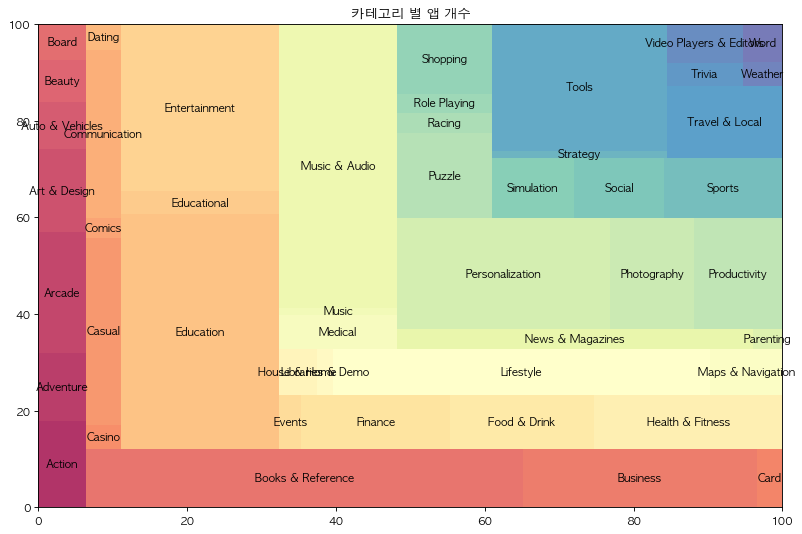

In [4]:
# avgGroupedAppByCategory = groupedAppByCategory.mean()
sizegGroupedAppCategory = groupedAppByCategory.size()

labels = sizegGroupedAppCategory.index.values.tolist()
sizees = sizegGroupedAppCategory
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizees, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('카테고리 별 앱 개수')

In [5]:
totalCounts = gizegGroupedAppCategory
totalCounts = gizegGroupedAppCategory.sort_values(axis=0, ascending=False)


upperCategories = totalCounts.iloc[0: 6]
lowerCategories = totalCounts.iloc[-6: ]


f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0].set_title('플레이 스토어에서 많이 사용된 누적 카테고리 5개')
ax[0].vlines(x=upperCategories.index, ymin=0, ymax=upperCategories.values, color='firebrick', alpha=0.7, linewidth=20)
ax[0].set_ylim([0, upperCategories.values.max()+ upperCategories.values.max() / 9])
for i, value in enumerate(upperCategories.values):
    ax[0].text(i, value+0.5, str(round(value, 1)) + "개", horizontalalignment='center')
    
ax[1].set_title('플레이 스토어에서 적게 사용된 누적  카테고리 5개')
ax[1].vlines(x=lowerCategories.index, ymin=0, ymax=lowerCategories.values, color='firebrick', alpha=0.7, linewidth=20)
ax[1].set_ylim([0, highIncidence.values.max() + highIncidence.values.max() / 9])
for i, value in enumerate(lowerCategories.values):
    ax[1].text(i, value+0.5, str(round(value, 1)) + "개", horizontalalignment='center')

plt.show()

NameError: name 'gizegGroupedAppCategory' is not defined

### 분석 결과
- Education, Music, Entertainment, Books, Peronalization, Tools 카테고리는 많은 앱이 배포되어 있음.
- Dating, Casino, Music, Libraries & Demo, Comiccs, Parenting 카테고리는 적은 앱이 배포되어 있음.
- Education 앱이 의외로 많음
- Dating 앱이 의외로 굉장히 적음

## 1-3 카테고리 별 리뷰 평균 점수 순위

In [ ]:
# Prepare Data
avgGroupCetegory = groupedAppByCategory.mean()
x = avgGroupCetegory['Rating']
x = x.sort_values(axis=0, ascending=True)

# df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
# df.sort_values('mpg_z', inplace=True)
# df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=avgGroupCetegory.index, xmin=0, xmax=x, color='red', alpha=0.4, linewidth=5)

# # Decorations
plt.gca().set(ylabel='$Category$', xlabel='$Review Score$')
# plt.yticks(avgGroupCetegory.index, avgGroupCetegory.values, fontsize=12)
plt.title('카테고리 별 리뷰 평균 점수 순위', fontdict={'size':20})
# plt.grid(linestyle='--', alpha=0.5)


### 분석 결과
- Word, Weather, Travle, Social 카테고리의 리뷰 평균 점수가 높음
- Action, Adventure, Arcade, Art & Design, Beauty, Education 카테고리 앱의 평균 점수는 형편 없음

## 1-4 최종 분석 결과
- 상위 5 개 앱은 가장 보편적이고, 심사 과정이 까다롭지 않을 거라고 추측할 수 있음, 그 반대는 기피해야 할 카테고리로 추측할 수 있음
- Education 은 배포된 앱은 많은데 리뷰 평균 점수가 형편없음

# 2. 유료앱 여부와 리뷰 점수 상관관계

### 전처리

In [ ]:
groupedAppByFree = playtore_df.groupby('Free')
sizeGroupedAppByFree = groupedAppByFree.size()

## 2-1 전체 앱 중 무료앱의 비중

In [ ]:
# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)
explode = [0,0]
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(sizeGroupedAppByFree, 
                                  autopct=lambda pct: func(pct, sizeGroupedAppByFree),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, sizeGroupedAppByFree.index, title="항목", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("전체 앱 중 무료앱 비중")
plt.show()

## 2-2 유료앱과 무료앱 평균 리뷰 점수

In [ ]:
groupedAppByFree.mean()['Rating']

## 2-3 최종 분석 결과
- 무료앱이 전체 앱 중 95.6% 를 차지함.
- 무료 앱(2.50)이 유료 앱(2.14)보다 평균 리뷰 점수가 높음.

# 3. 광고를 포함하는 앱과 그렇지 않은 앱의 리뷰 평균 점수 비교

In [ ]:
groupedAppByAd = playtore_df.groupby('Ad Supported')
sizeGroupedAppByAd = groupedAppByAd.size()
sizeGroupedAppByAd

## 3-1 전체 앱 중 광고를 포함하는 앱의 비중

In [ ]:
# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)
explode = [0,0]
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(sizeGroupedAppByAd, 
                                  autopct=lambda pct: func(pct, sizeGroupedAppByAd),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, sizeGroupedAppByAd.index, title="항목", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("전체 앱 중 광고를 포함하는 앱의 비중")
plt.show()

## 3-2 광고를 포함한 앱과 그렇지 않은 앱 리뷰 평균 점수 비교 

In [ ]:
groupedAppByAd.mean()['Rating']

## 3-3 최종 분석 결과
- 광고를 포함하는 앱이 전체의 64%임
- 광고를 포함하는 앱이 오히려 리뷰 평균 점수가 높았다.

# 분석최종 정리

- Education, Music, Entertainment, Books, Peronalization, Tools 카테고리는 비교적 배포 심사의 허들이 많을 수 있음.
- Dating, Casino, Music, Libraries & Demo, Comiccs, Parenting 카테고리는 앱이 심사에서 거절 당할 확률이 높을 있음.
- 유료앱보다는 무료앱의 리뷰 평균 점수가 높음
- 광고 포함 여부는 생각보다 리뷰 점수에 크게 영향을 끼치지 않음.